<a href="https://colab.research.google.com/github/jeanncarlos7/1tdspzReact/blob/main/RM550430_JeanCarlos_202302_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
df = pd.read_csv("/one-star-michelin-restaurants.csv")

In [5]:
origem = "https://www.kaggle.com/datasets/jackywang529/michelin-restaurants"
nome = "michelin-restaurants"
tamanho = "86 kB"
quantidade_registros = len(df)
linhas_colunas = df.shape
dados_faltantes = df.isnull().sum()
print(f"Origem: {origem}")
print(f"Nome: {nome}")
print(f"Tamanho: {tamanho}")
print(f"Quantidade de Registros: {quantidade_registros}")
print(f"Linhas x Colunas: {linhas_colunas}")
print(f"Dados Faltantes:\n{dados_faltantes}\n")

Origem: https://www.kaggle.com/datasets/jackywang529/michelin-restaurants
Nome: michelin-restaurants
Tamanho: 86 kB
Quantidade de Registros: 549
Linhas x Colunas: (549, 10)
Dados Faltantes:
name           0
year           0
latitude       0
longitude      0
city           2
region         0
zipCode      149
cuisine        0
price        151
url            0
dtype: int64



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.fillna(0, inplace=True)

In [8]:
df

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
...,...,...,...,...,...,...,...,...,...,...
544,The Sportsman,2019,51.343920,0.958850,Seasalter,United Kingdom,CT5 4BP,Modern British,0,https://guide.michelin.com/gb/en/kent/seasalte...
545,West House,2019,51.115210,0.642150,Biddenden,United Kingdom,TN27 8AH,Modern British,0,https://guide.michelin.com/gb/en/kent/biddende...
546,Fordwich Arms,2019,51.295284,1.126187,Fordwich,United Kingdom,CT2 0DB,Modern cuisine,0,https://guide.michelin.com/gb/en/kent/fordwich...
547,Samphire,2019,49.184880,-2.105700,Saint Helier/Saint-Hélier,United Kingdom,JE2 4TQ,Modern cuisine,0,https://guide.michelin.com/gb/en/saint-helier/...


In [9]:
df['latitude'] = 2023 - df['longitude']

In [11]:
threshold = 75  # Limite para definir classes
df['Class'] = (df['latitude'] > threshold).astype(int)

In [12]:
X = df[['longitude', 'latitude']]
y = df['latitude']

In [30]:
df['longitude'] = (df['latitude'] > 85).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, df['longitude'], test_size=0.2, random_state=42)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X = df[['longitude', 'latitude']]
y = df['latitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [34]:
model_decision_tree_regressor = DecisionTreeRegressor()
model_decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
mse = mean_squared_error(y_test, y_pred_decision_tree)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0036216591674788964


In [40]:
model_decision_tree_classifier = DecisionTreeClassifier()
model_decision_tree_classifier.fit(X_train, df['Class'][X_train.index])

DecisionTreeClassifier()

In [41]:
y_pred_decision_tree_classifier = model_decision_tree_classifier.predict(X_test)

In [42]:
conf_matrix_decision_tree = confusion_matrix(df['Class'][X_test.index], y_pred_decision_tree_classifier)
print("Matriz de Confusão:")
print(conf_matrix_decision_tree)

Matriz de Confusão:
[[110]]


In [43]:
class_report_decision_tree = classification_report(df['Class'][X_test.index], y_pred_decision_tree_classifier)
print("Relatório de Classificação:")
print(class_report_decision_tree)

Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([1909.43744  , 2140.886566 , 2023.9542898, 2012.791362 ,
       2022.01271  , 2023.153031 , 2110.68686  , 1901.44719  ,
       1998.04744  , 1901.44981  , 2003.94744  , 2006.65885  ,
       2141.255844 , 2096.99375  , 2066.17901  , 2110.69596  ,
       1922.46549  , 2006.62826  , 2097.00001  , 2024.88384  ,
       1922.47061  , 1908.84687  , 2025.3627   , 1908.84354  ,
       2110.70638  , 2022.04115  , 2003.938221 , 1895.89743  ,
       2023.15662  , 2023.13673  , 2096.95187  , 2023.69641  ,
       2023.1352   , 2141.30057  , 1908.82818  , 2141.07159  ,
       2009.96591  , 1908.8428   , 2025.8845797, 2023.142555 ,
       2017.267123 , 2097.00744  , 2005.014252 , 2141.275406 ,
       1908.815865 , 1922.43152  , 2023.16724  , 2023.15039  ,
       2069.67974  , 2023.14141  , 1922.453674 , 2141.338974 ,
       2097.00451  , 1901.45191  , 1919.1393   , 2145.40534  ,
       2023.0781   , 2026.87354  , 2110.66792  , 2027.97088  ,
       2023.7915291, 2096.98922  , 2145.39213  , 1908.8

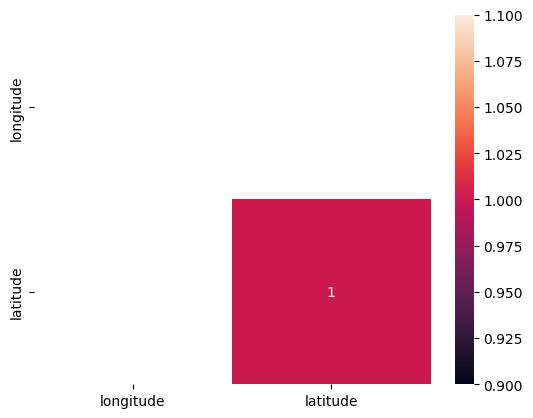

In [48]:
corr_matrix = df[['longitude', 'latitude']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
print(df.head())

            name  year    latitude  longitude            city   region  \
0   Kilian Stuba  2019  2012.82886          1  Kleinwalsertal  Austria   
1  Pfefferschiff  2019  2009.92083          1        Hallwang  Austria   
2      Esszimmer  2019  2009.96591          1        Salzburg  Austria   
3     Carpe Diem  2019  2009.95994          1        Salzburg  Austria   
4         Edvard  2019  2006.63148          1            Wien  Austria   

  zipCode          cuisine  price  \
0   87568         Creative  $$$$$   
1    5300  Classic cuisine  $$$$$   
2    5020         Creative  $$$$$   
3    5020   Market cuisine  $$$$$   
4    1010   Modern cuisine   $$$$   

                                                 url  Class  Potential  
0  https://guide.michelin.com/at/en/vorarlberg/kl...      1          1  
1  https://guide.michelin.com/at/en/salzburg-regi...      1          1  
2  https://guide.michelin.com/at/en/salzburg-regi...      1          1  
3  https://guide.michelin.com/at/en/salz

In [51]:
print(df[['longitude', 'latitude']].describe())

       longitude     latitude
count      549.0   549.000000
mean         1.0  2019.639890
std          0.0    79.366838
min          1.0  1895.897430
25%          1.0  1922.459080
50%          1.0  2023.152262
75%          1.0  2096.982920
max          1.0  2146.719444


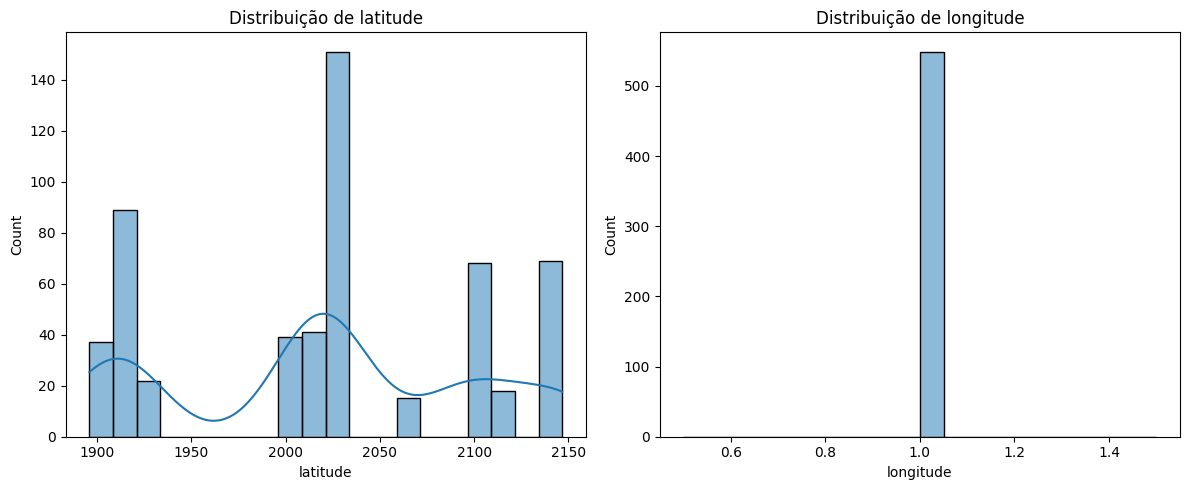

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['latitude'], bins=20, kde=True)
plt.title('Distribuição de latitude')
plt.subplot(1, 2, 2)
sns.histplot(df['longitude'], bins=20, kde=True)
plt.title('Distribuição de longitude')

plt.tight_layout()
plt.show()

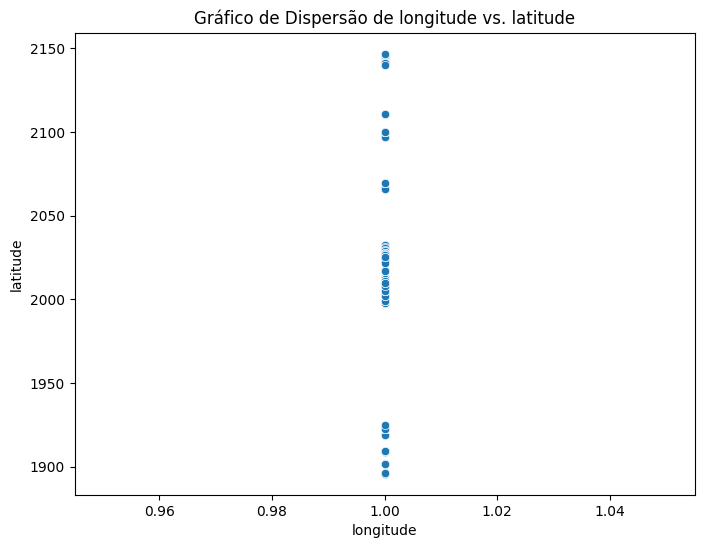

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('Gráfico de Dispersão de longitude vs. latitude')
plt.show()

In [55]:
corr = df[['latitude', 'longitude']].corr()
print("Correlação entre latitude e longitude:\n", corr)

Correlação entre latitude e longitude:
            latitude  longitude
latitude        1.0        NaN
longitude       NaN        NaN


Com base na análise realizada e nos modelos já treinados:

Regressão Linear:

A regressão linear é uma escolha apropriada quando você está tentando entender a relação linear entre duas variáveis, como 'longitude' e 'latitude'. Se a matriz de correlação mostrou uma forte correlação linear entre essas variáveis, a regressão linear pode ser usada para prever 'latitude' com base em 'longitude'.